# Resumen de la base de datos 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/Users/mauriciodiaz/itam/semestre7/MusicML/data/tracks_audio_features.csv')
df = df.drop(columns=['analysis_url', 'track_href', 'uri', 'type'])

In [11]:
df['like'].describe()

count    3484.000000
mean        0.496269
std         0.500058
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: like, dtype: float64

In [12]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'duration_ms', 'time_signature', 'like'],
      dtype='object')

## Summary Statistics

In [ ]:
target_col = 'like'

auto.dataset_overview(train_data=df, label=target_col)

## Column Distribution

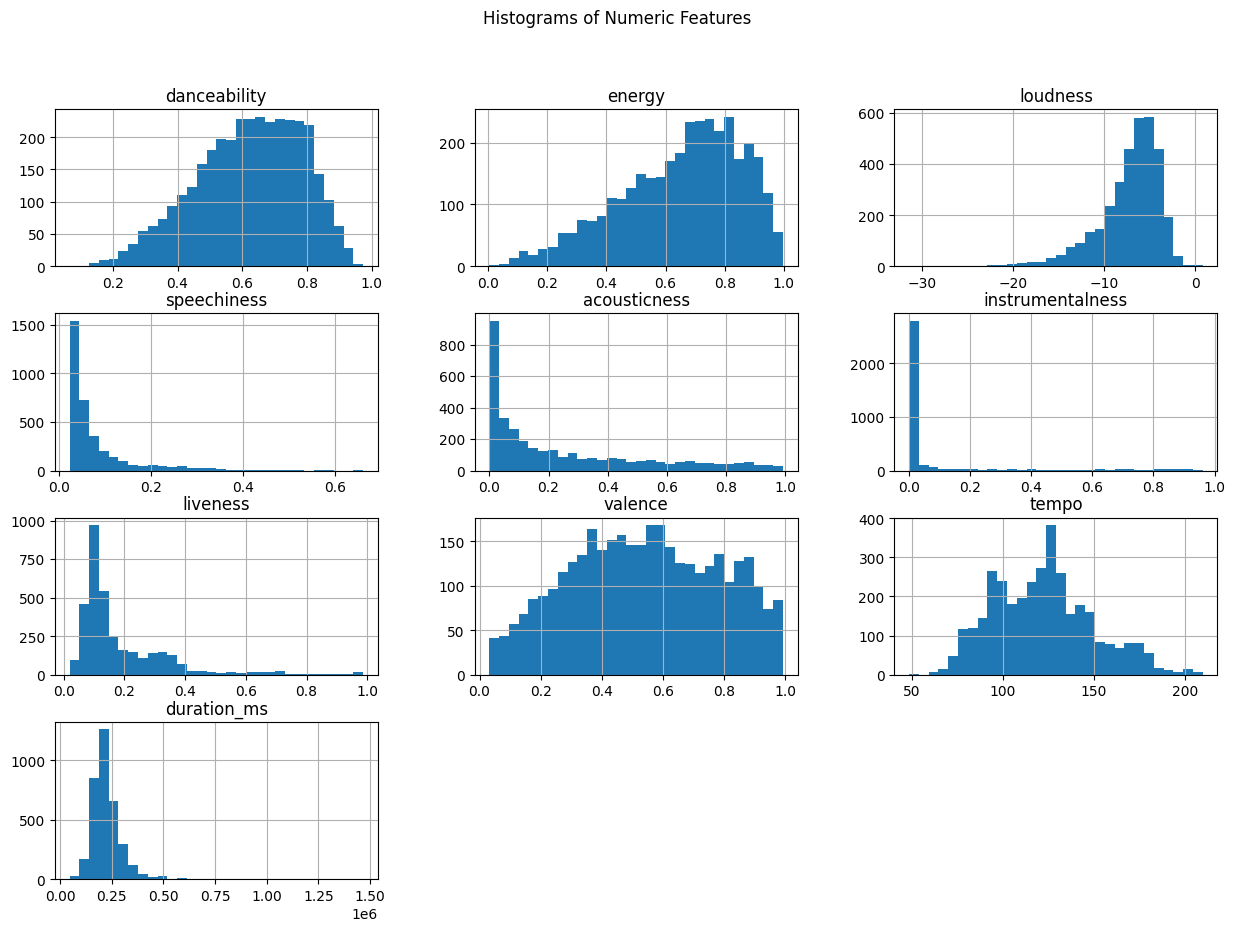

In [3]:
numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
df[numeric_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

In [4]:
import numpy as np

def count_outliers_zscore(df, threshold=3):
    # Only select numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outlier_counts = {}
    
    for column in numeric_cols:
        # Calculate z-score
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        
        # Count outliers (typically, values more than 3 standard deviations away)
        outliers = df[z_scores > threshold][column]
        outlier_counts[column] = len(outliers)
    
    return pd.Series(outlier_counts)

def analyze_outliers(df):
    outlier_counts = count_outliers_zscore(df)
    total_rows = len(df)
    
    # Calculate percentages
    outlier_percentages = (outlier_counts / total_rows * 100).round(2)
    
    # Combine counts and percentages
    analysis = pd.DataFrame({
        'Outlier Count': outlier_counts,
        'Percentage': outlier_percentages
    })
    
    return analysis

# Use the function
outlier_analysis = analyze_outliers(df)
print("\nOutlier analysis:")
print(outlier_analysis)


Outlier analysis:
                  Outlier Count  Percentage
danceability                  3        0.09
energy                        4        0.11
key                           0        0.00
loudness                     52        1.49
mode                          0        0.00
speechiness                  92        2.64
acousticness                  0        0.00
instrumentalness            160        4.59
liveness                    101        2.90
valence                       0        0.00
tempo                         6        0.17
duration_ms                  45        1.29
time_signature               33        0.95
like                          0        0.00


# Outliers con BoxPlots

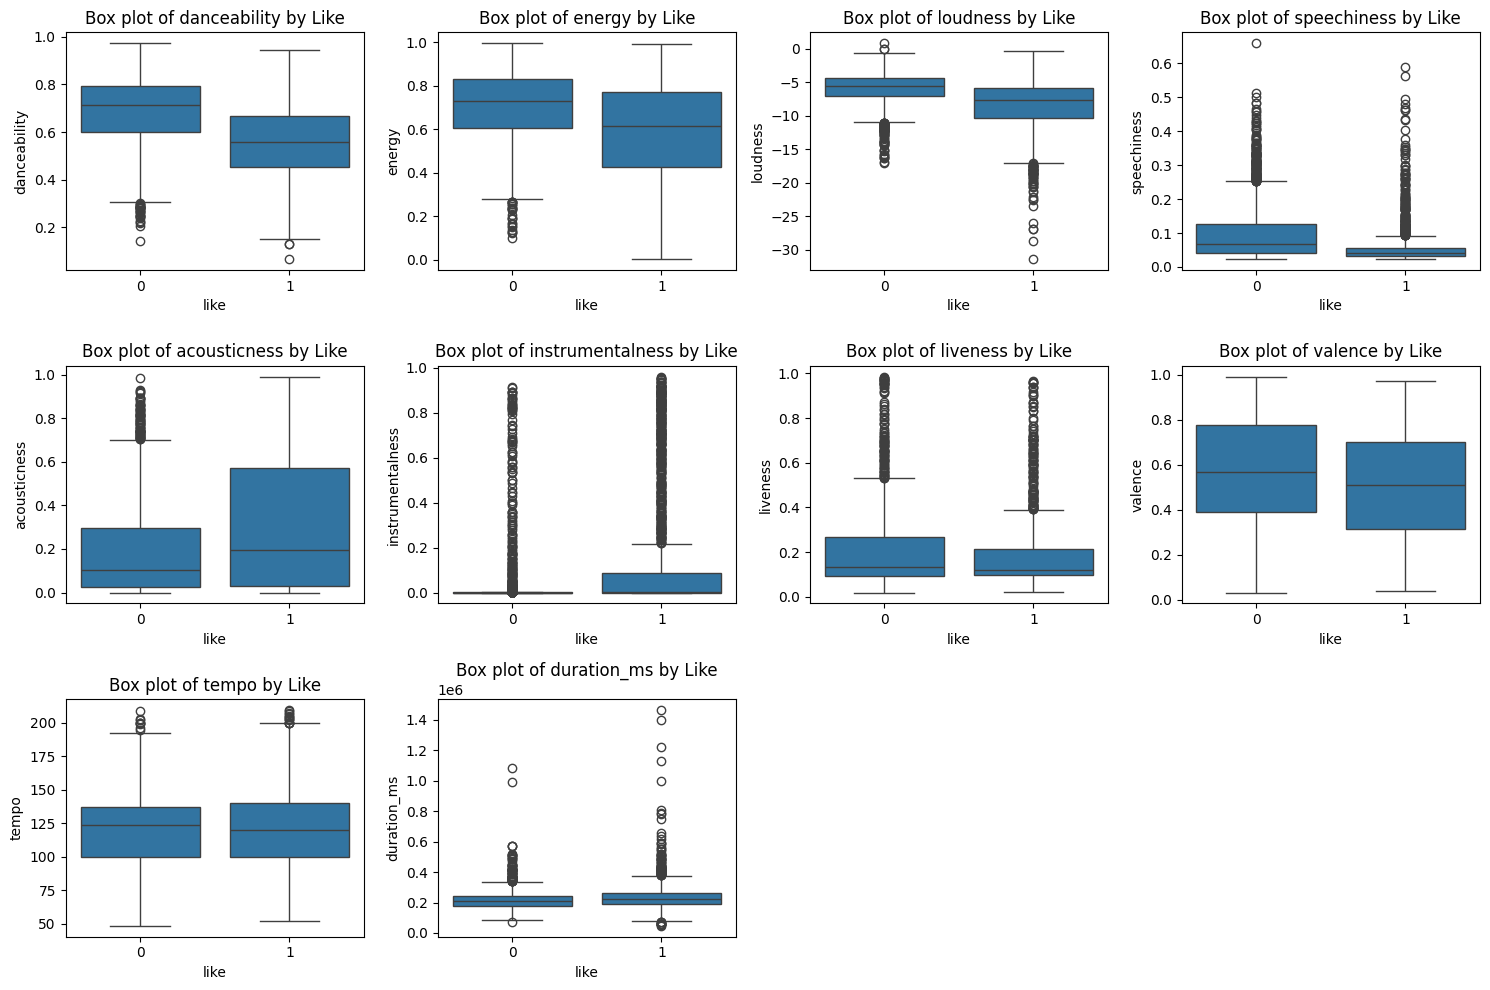

In [8]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x='like', y=column)
    plt.title(f'Box plot of {column} by Like')
plt.tight_layout()
plt.show()

# Matriz de Correlacion

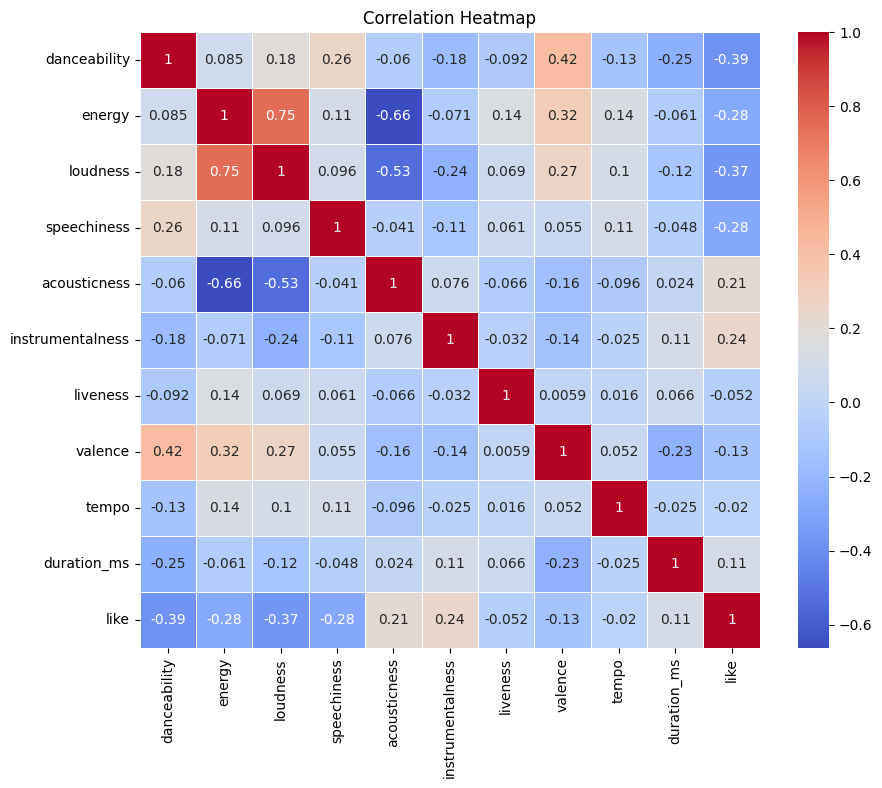

In [9]:
correlation_matrix = df[numeric_columns + ['like']].corr()
# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


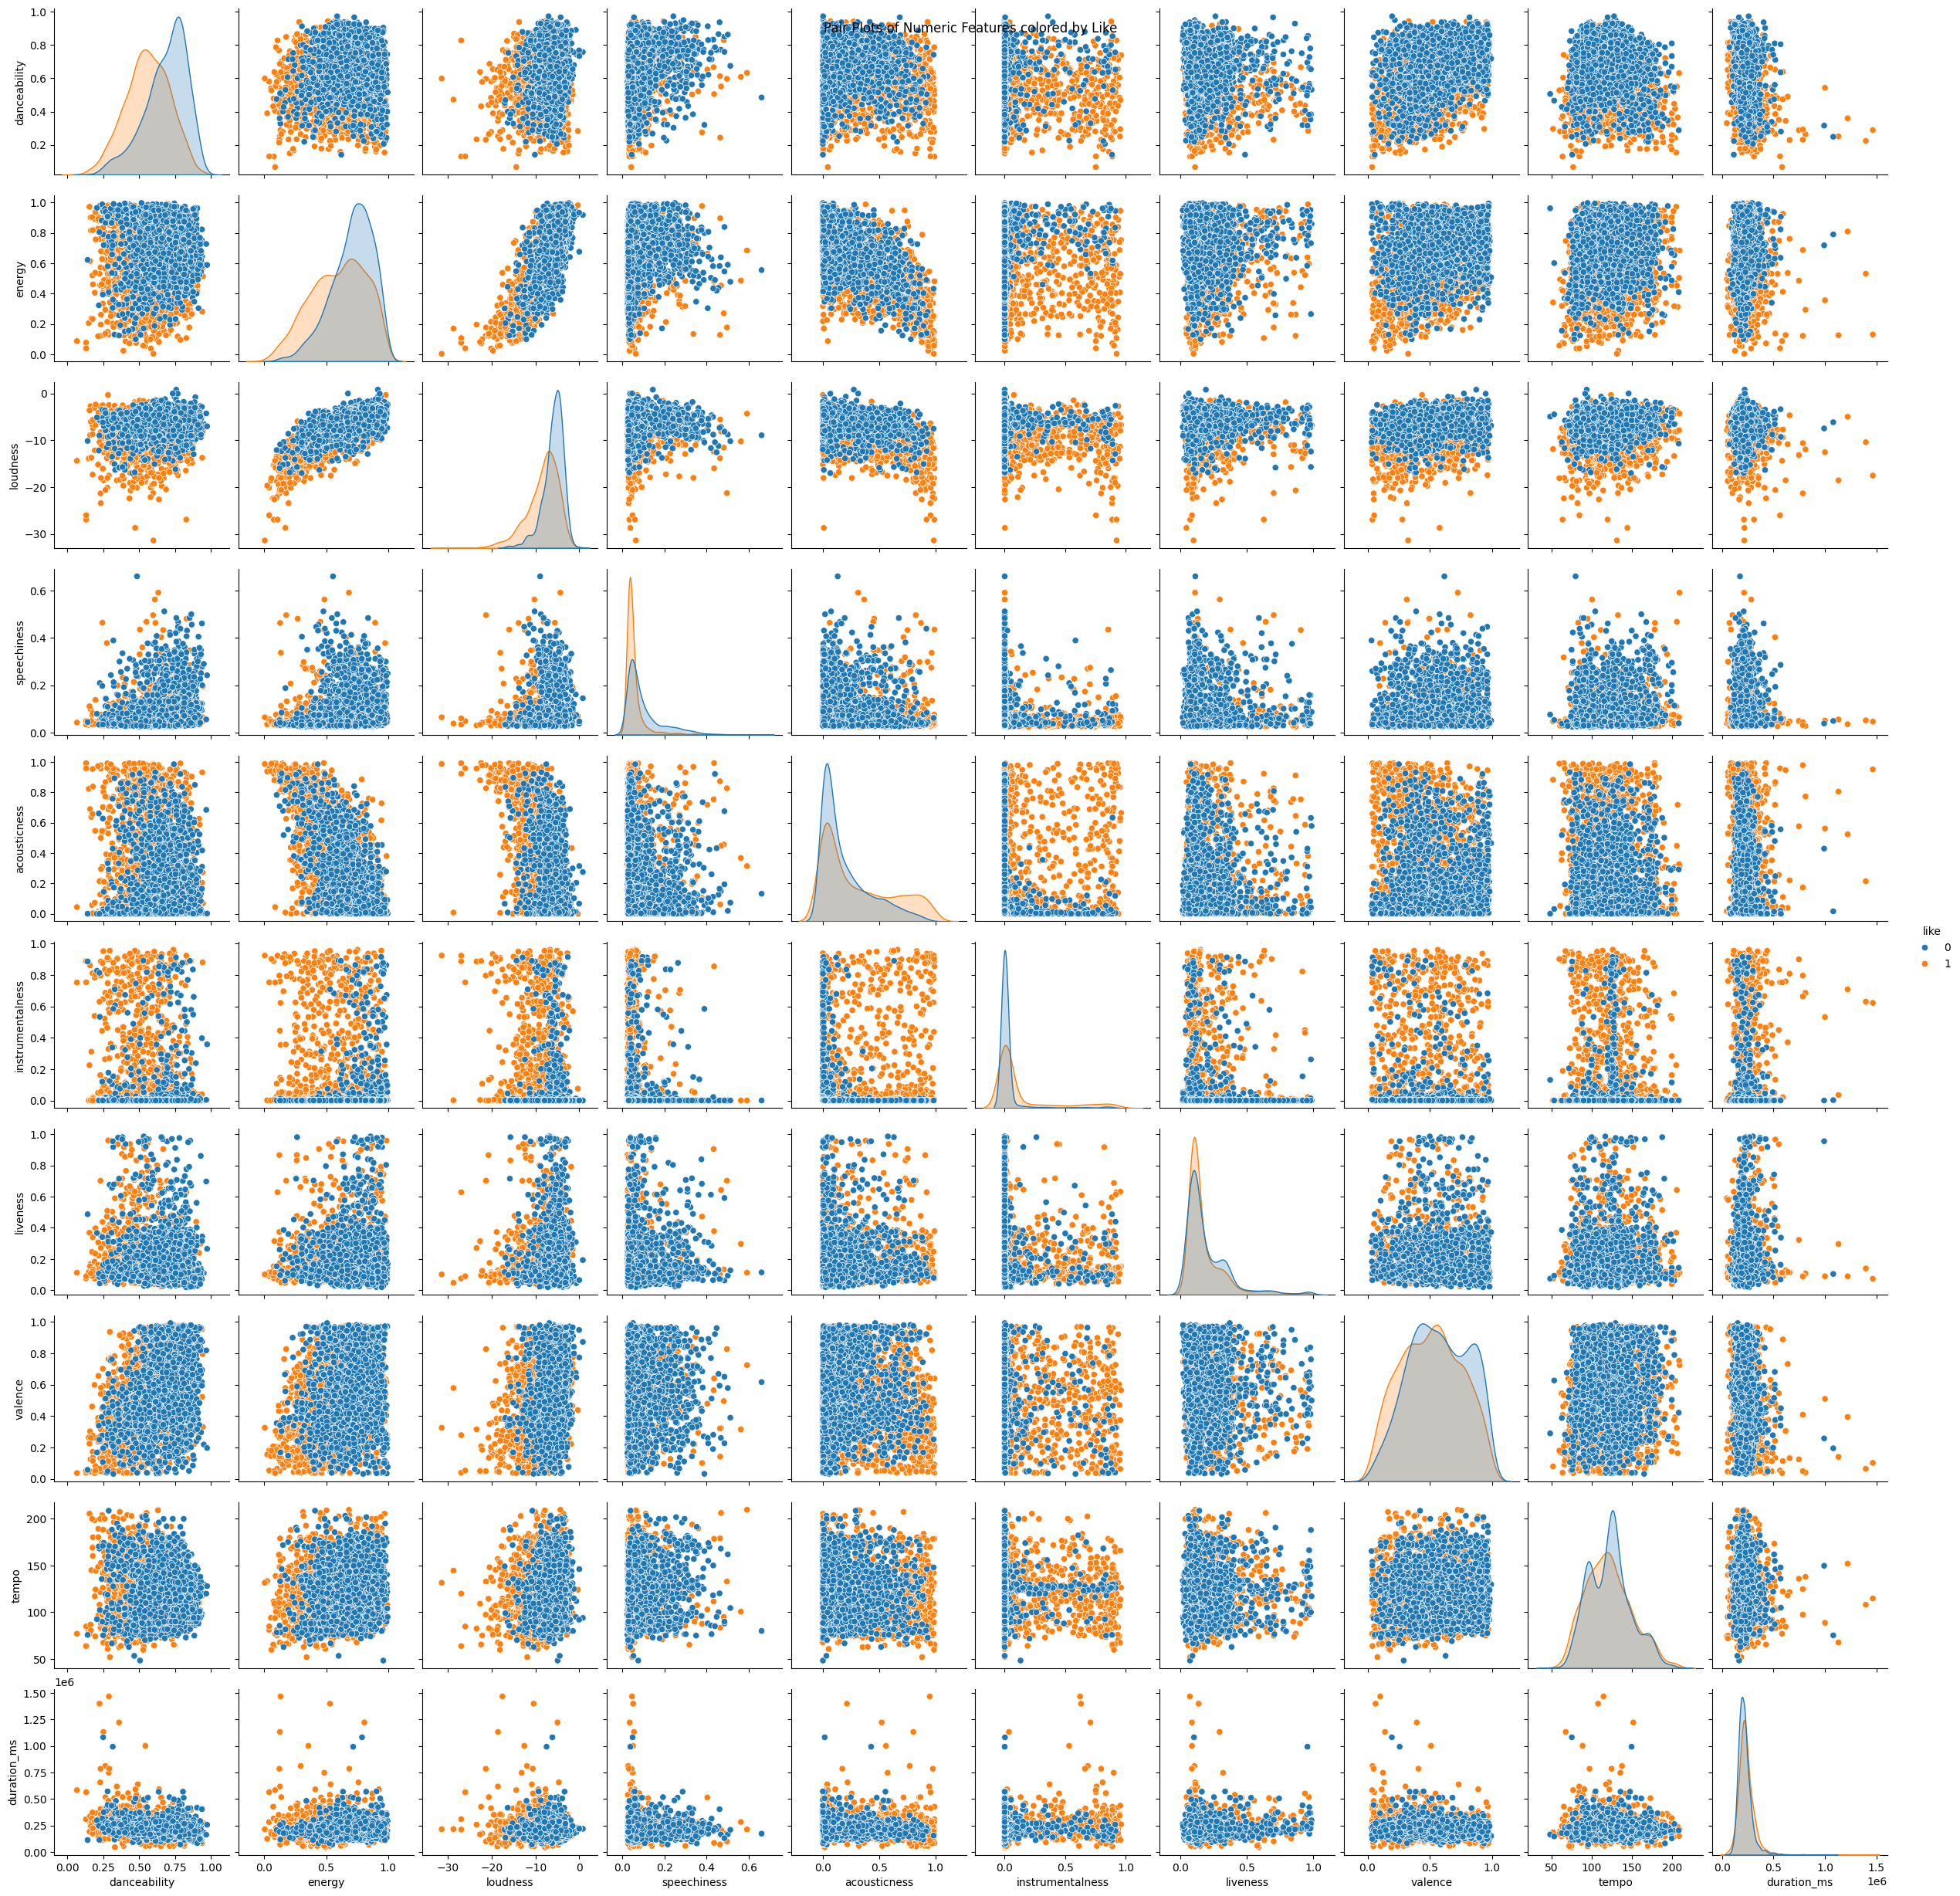

In [10]:
sns.pairplot(df, vars=numeric_columns, hue='like', diag_kind='kde')
plt.suptitle('Pair Plots of Numeric Features colored by Like')
plt.show()

# Datos faltantes

In [6]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
id                  0
duration_ms         0
time_signature      0
like                0
dtype: int64


# Variable Objetivo

In [ ]:
auto.target_analysis(train_data=df, label=target_col)

# Correlacion variables categoricas

In [13]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'duration_ms', 'time_signature', 'like'],
      dtype='object')

Correlation with target variable 'like':
--------------------------------------------------
0.16413016396322322

time_signature:
Chi-square statistic: 5.11
P-value: 0.1641
Cramer's V: 0.0383
4.0300034598736825e-12

key:
Chi-square statistic: 77.74
P-value: 0.0000
Cramer's V: 0.1494
1.579182419929626e-10

mode:
Chi-square statistic: 40.93
P-value: 0.0000
Cramer's V: 0.1084


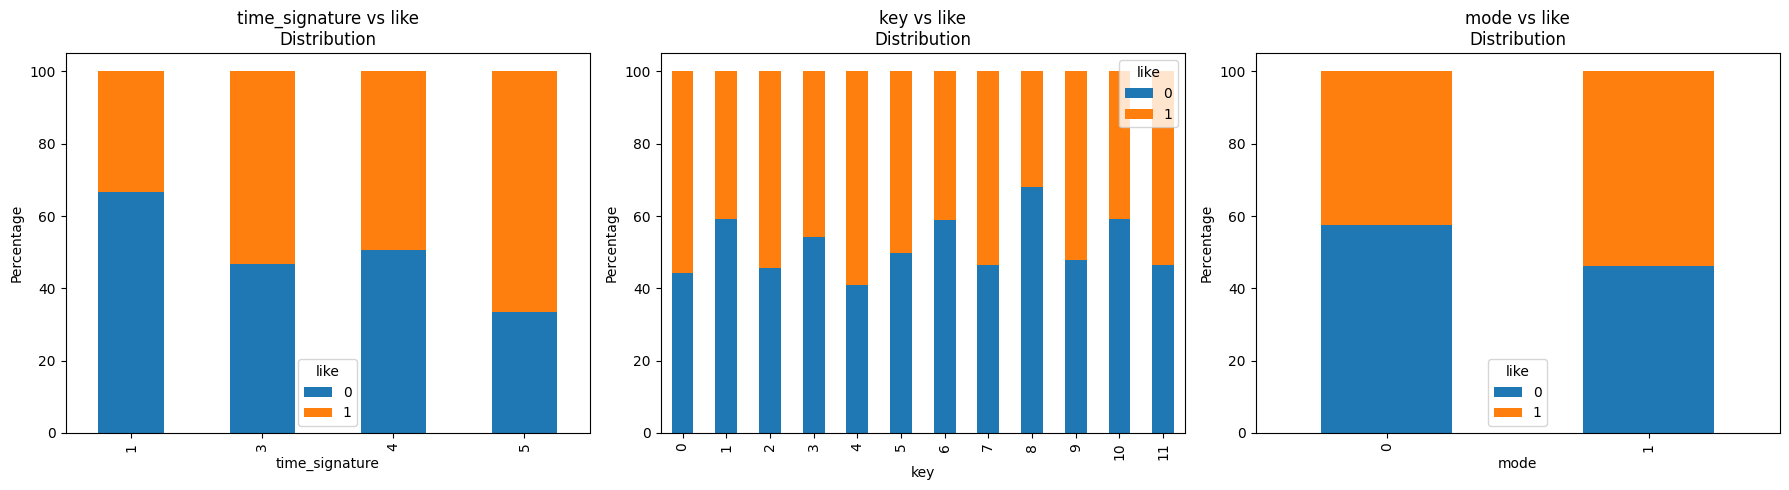

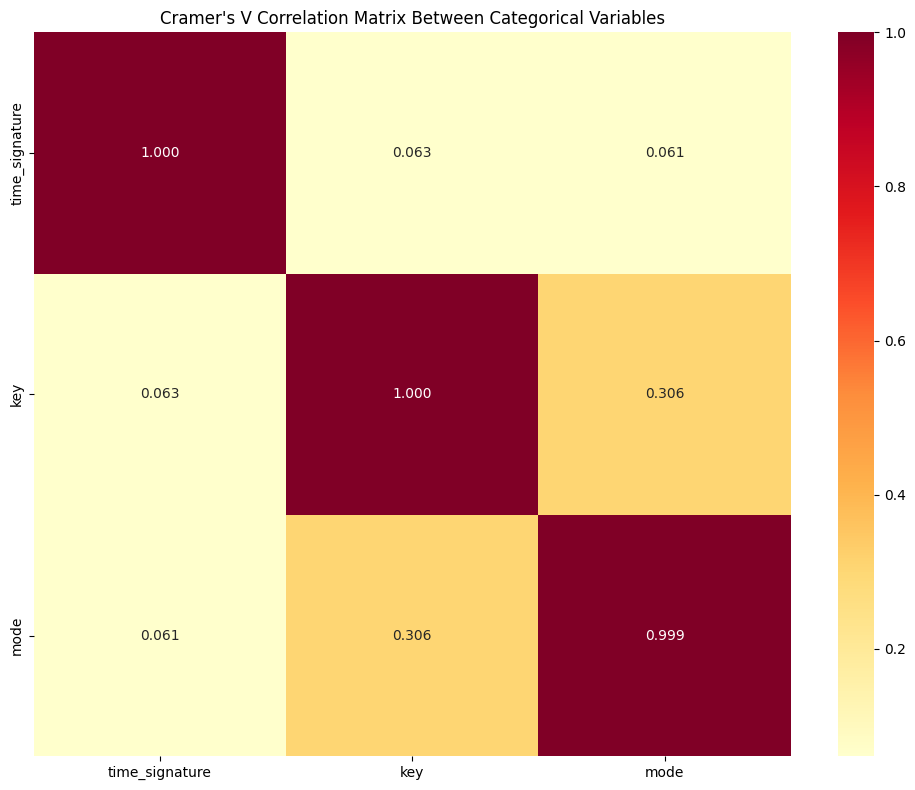


Summary of Correlations with Target Variable:
--------------------------------------------------
      Variable  Cramers_V  Chi_Square      P_Value
           key   0.149377   77.739787 4.030003e-12
          mode   0.108386   40.928294 1.579182e-10
time_signature   0.038286    5.106964 1.641302e-01


In [18]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_categorical_correlations(df, cat_vars, target):
    """
    Analyze correlations between categorical variables and target variable
    """
    # Dictionary to store results
    results = {}
    
    # 1. Analyze relationship with target variable 'like'
    print("Correlation with target variable 'like':")
    print("-" * 50)
    
    # Create subplots for categorical vs target variable
    n_cats = len(cat_vars)
    fig, axes = plt.subplots(1, n_cats, figsize=(6*n_cats, 5))
    if n_cats == 1:
        axes = [axes]
    
    for var, ax in zip(cat_vars, axes):
        # Create contingency table
        contingency = pd.crosstab(df[var], df[target], normalize='index') * 100
        
        # Plot stacked bar chart
        contingency.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(f'{var} vs {target}\nDistribution')
        ax.set_ylabel('Percentage')
        ax.set_xlabel(var)
        ax.legend(title=target)
        
        # Calculate statistics
        cont_table = pd.crosstab(df[var], df[target])
        chi2, p_value, dof, expected = chi2_contingency(cont_table)
        print(p_value)
        
        # Calculate Cramer's V
        n = cont_table.sum().sum()
        min_dim = min(cont_table.shape) - 1
        cramer = np.sqrt(chi2 / (n * min_dim))
        
        results[var] = {
            'chi2': chi2,
            'p_value': p_value,
            'cramers_v': cramer
        }
        
        print(f"\n{var}:")
        print(f"Chi-square statistic: {chi2:.2f}")
        print(f"P-value: {p_value:.4f}")
        print(f"Cramer's V: {cramer:.4f}")
    
    plt.tight_layout()
    plt.show()
    
    # 2. Create correlation matrix between categorical variables
    n_vars = len(cat_vars)
    corr_matrix = np.zeros((n_vars, n_vars))
    
    for i, var1 in enumerate(cat_vars):
        for j, var2 in enumerate(cat_vars):
            if i <= j:  # Only calculate upper triangle
                contingency = pd.crosstab(df[var1], df[var2])
                chi2, _, _, _ = chi2_contingency(contingency)
                n = contingency.sum().sum()
                min_dim = min(contingency.shape) - 1
                cramer = np.sqrt(chi2 / (n * min_dim))
                corr_matrix[i,j] = cramer
                corr_matrix[j,i] = cramer
    
    # Create correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, 
                annot=True, 
                cmap='YlOrRd', 
                xticklabels=cat_vars,
                yticklabels=cat_vars,
                fmt='.3f')
    plt.title("Cramer's V Correlation Matrix Between Categorical Variables")
    plt.tight_layout()
    plt.show()
    
    # 3. Create summary table of correlations with target
    target_correlations = pd.DataFrame([
        {
            'Variable': var,
            'Cramers_V': results[var]['cramers_v'],
            'Chi_Square': results[var]['chi2'],
            'P_Value': results[var]['p_value']
        }
        for var in cat_vars
    ])
    
    # Sort by correlation strength
    target_correlations = target_correlations.sort_values('Cramers_V', ascending=False)
    
    print("\nSummary of Correlations with Target Variable:")
    print("-" * 50)
    print(target_correlations.to_string(index=False))
    
    return results, target_correlations

# Run the analysis
categorical_vars = ['time_signature', 'key', 'mode']
results, target_summary = analyze_categorical_correlations(df, categorical_vars, 'like')